<p><h1><b><font color="Magenta">Classification</p>

## About diabetes_prediction_dataset.csv :

The diabetes_prediction_dataset.csv file contains medical and demographic data of patients along with their diabetes status, whether positive or negative.

It consists of various features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.

The Dataset can be utilized to construct machine learning models that can predict the likelihood of diabetes in patients based on their medical history and demographic details.

**Link to Dataset** - https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset?resource=download

In [163]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
# Read the CSV file from Google Drive
file_path = '/content/diabetes_prediction_dataset.csv'

In [165]:
df=pd.read_csv(file_path)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


##EDA and Pre-processing

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [167]:
df.shape

(100000, 9)

In [168]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [169]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [170]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [171]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [172]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [175]:
#Target variable
df.diabetes.unique()

array([0, 1])

In [176]:
df.diabetes.value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

##Plotting Graphs for *Categorical variables* 

<Axes: xlabel='gender', ylabel='count'>

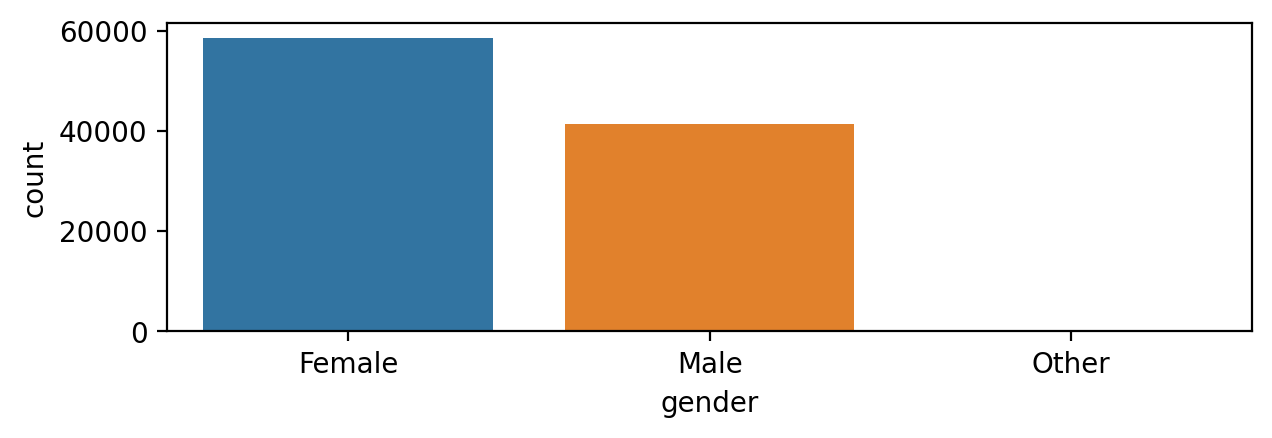

In [177]:
#Plotting countplot for categorical variable 
plt.figure(figsize = (7,2), dpi = 200)
sns.countplot(x = "gender", data = df)

<Axes: xlabel='hypertension', ylabel='count'>

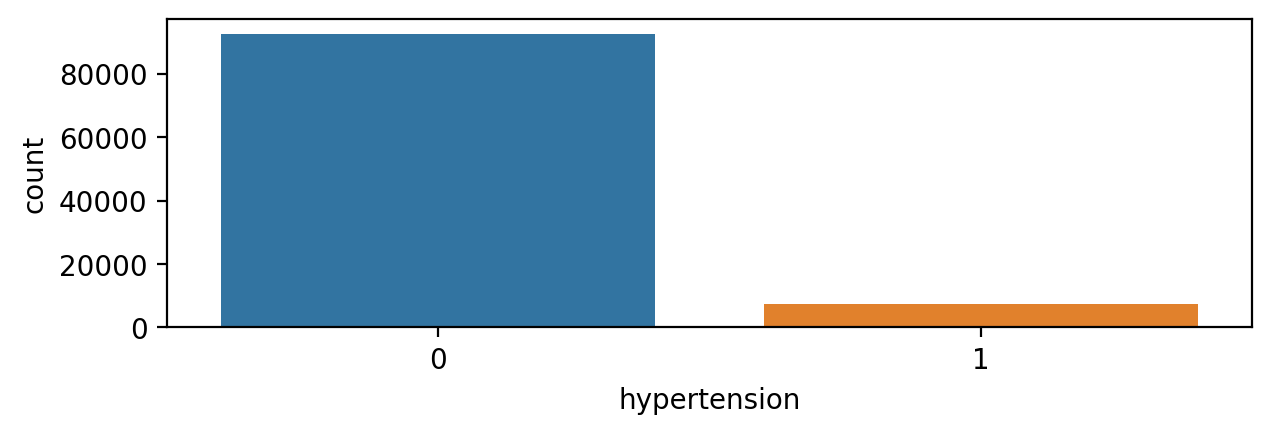

In [178]:
#Plotting countplot for categorical variable 
plt.figure(figsize = (7,2), dpi = 200)
sns.countplot(x = "hypertension", data = df)

<Axes: xlabel='heart_disease', ylabel='count'>

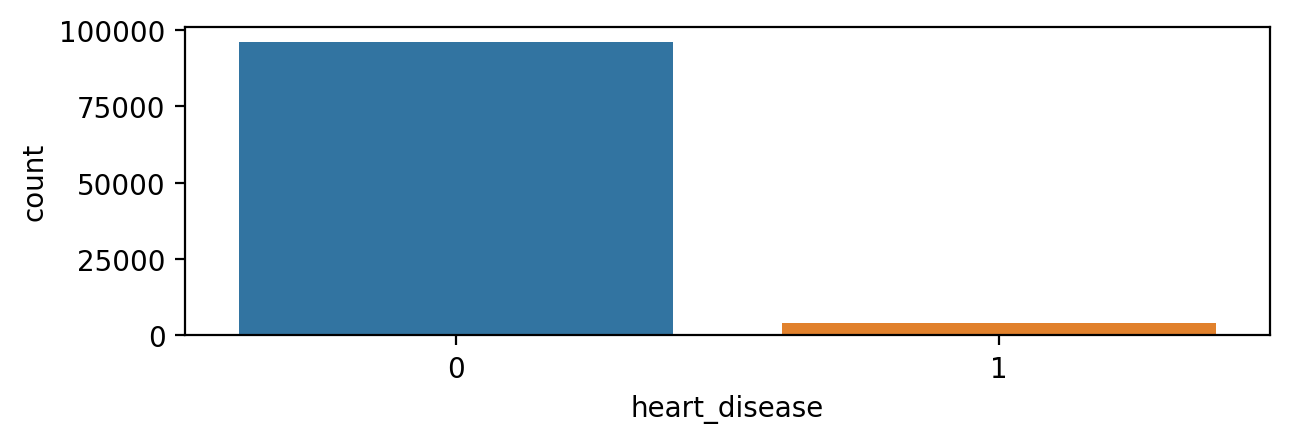

In [179]:
#Plotting countplot for categorical variable 
plt.figure(figsize = (7,2), dpi = 200)
sns.countplot(x = "heart_disease", data = df)

<Axes: xlabel='smoking_history', ylabel='count'>

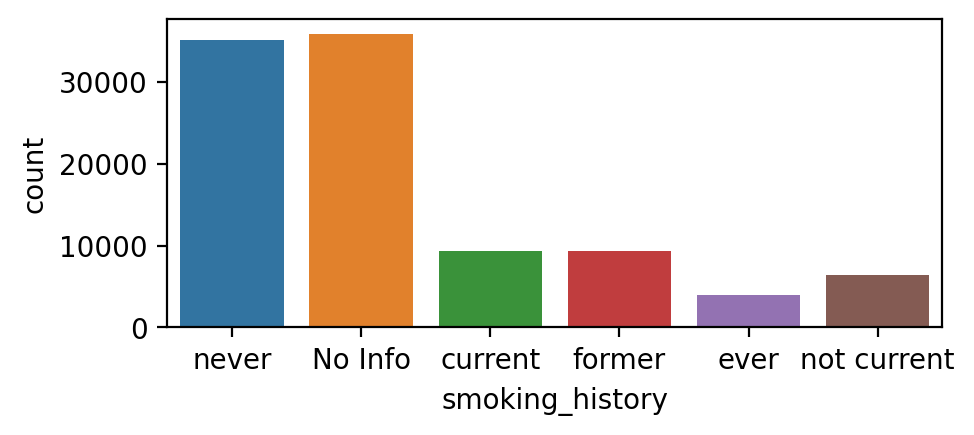

In [180]:
#Plotting countplot for categorical variable 
plt.figure(figsize = (5,2), dpi = 200)
sns.countplot(x = "smoking_history", data = df)

<Axes: xlabel='diabetes', ylabel='count'>

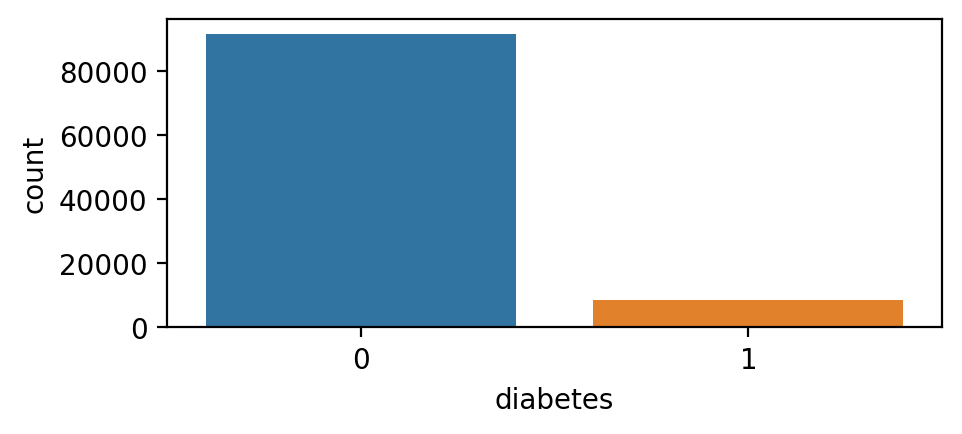

In [181]:
#Plotting countplot for categorical variable 
plt.figure(figsize = (5,2), dpi = 200)
sns.countplot(x = "diabetes", data = df)

##Plotting Graphs for *Numerical variables*

<Axes: ylabel='age'>

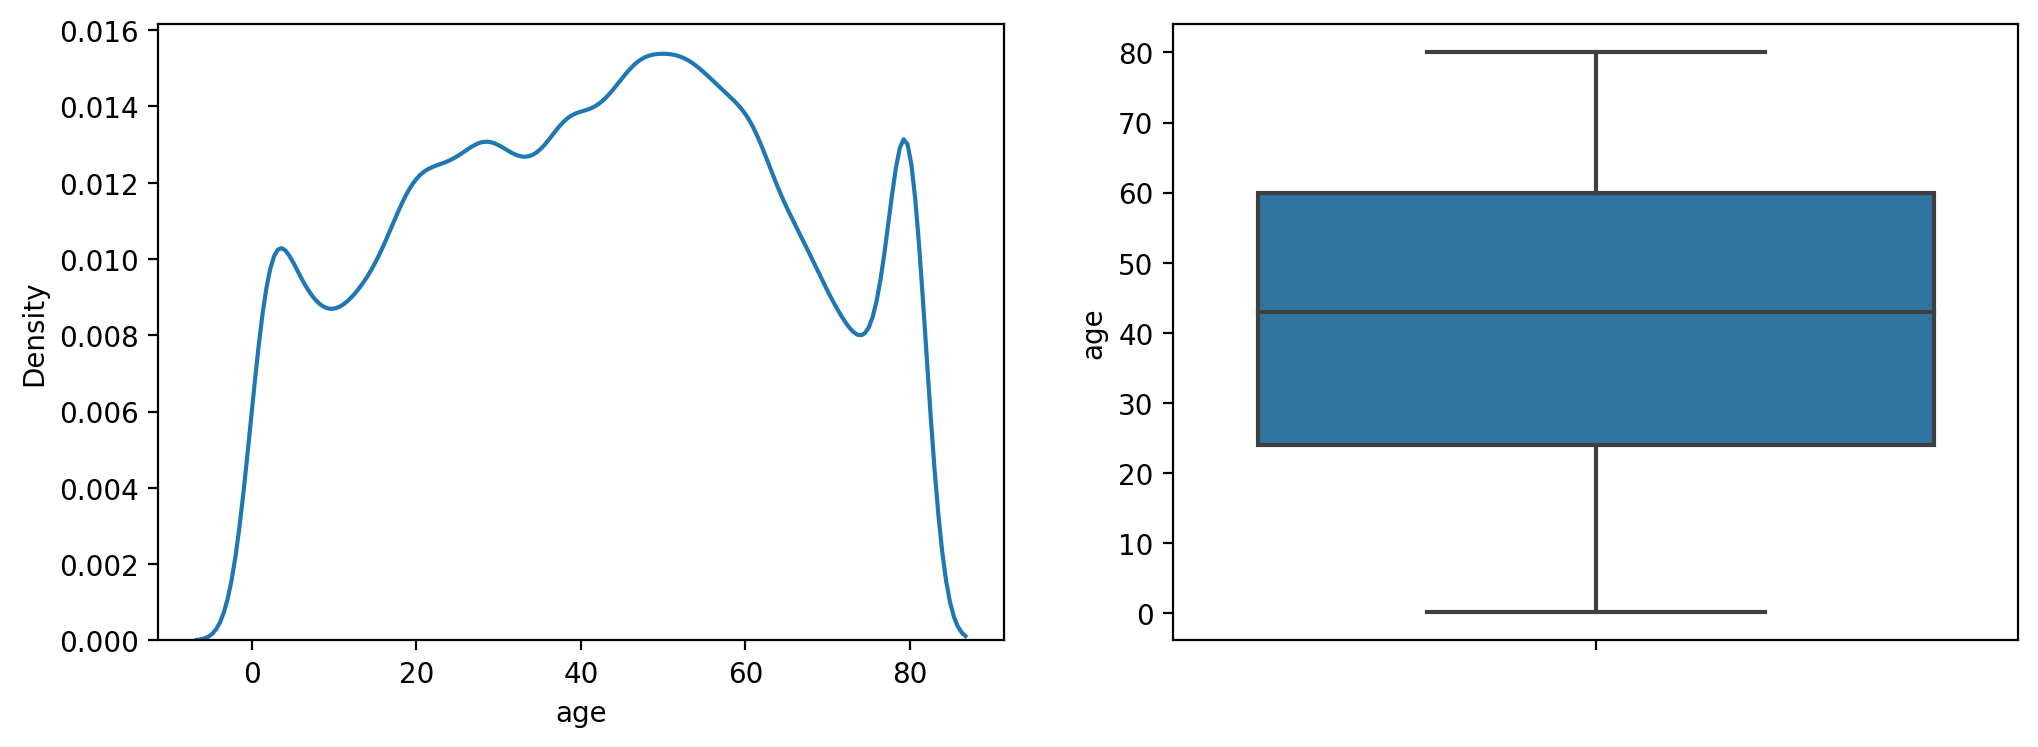

In [182]:
plt.figure(figsize = (12,4), dpi = 200)

plt.subplot(1,2,1)
sns.distplot(df['age'], hist = False)

plt.subplot(1,2,2)
sns.boxplot(y = df['age'])

<Axes: ylabel='bmi'>

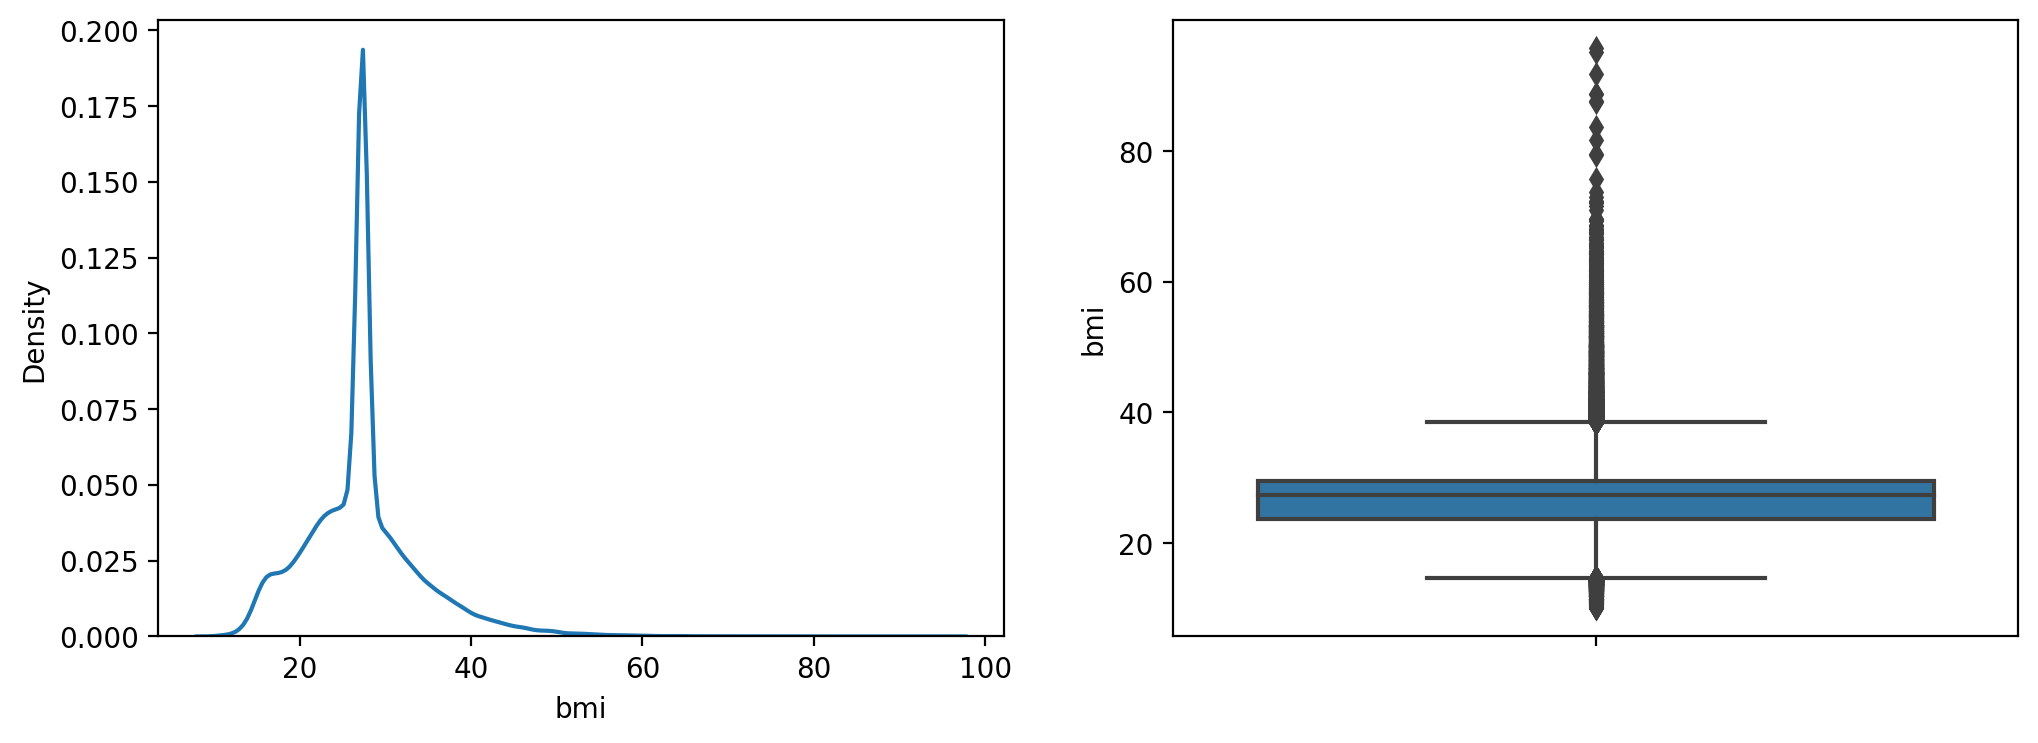

In [183]:
plt.figure(figsize = (12,4), dpi = 200)

plt.subplot(1,2,1)
sns.distplot(df['bmi'], hist = False)

plt.subplot(1,2,2)
sns.boxplot(y = df['bmi'])

<Axes: ylabel='HbA1c_level'>

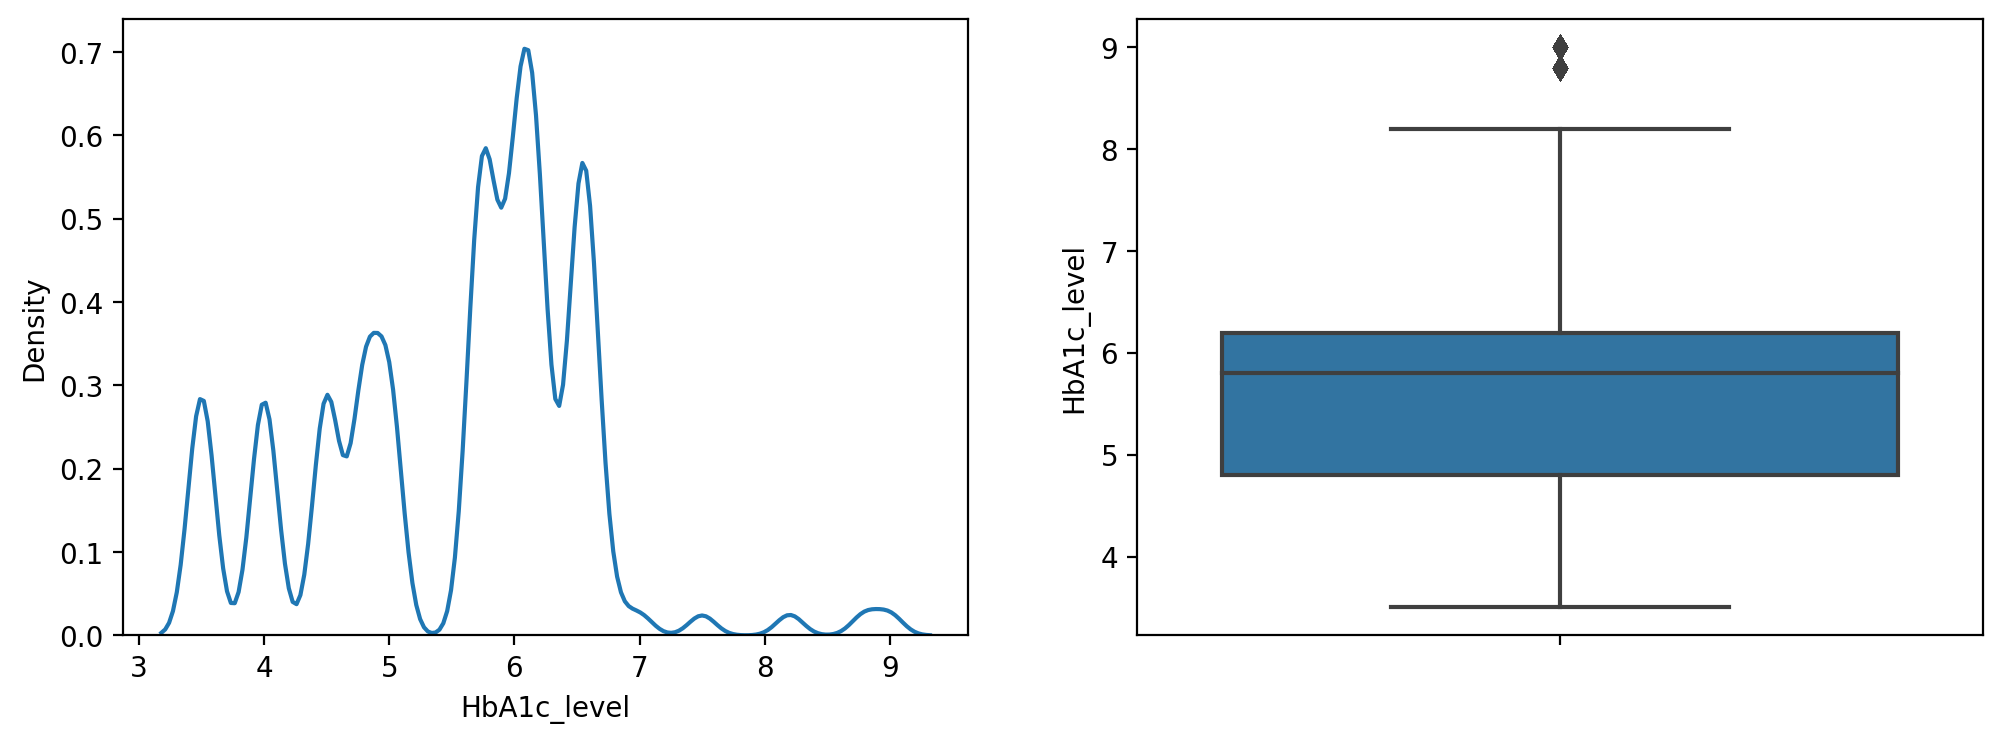

In [184]:
plt.figure(figsize = (12,4), dpi = 200)

plt.subplot(1,2,1)
sns.distplot(df['HbA1c_level'], hist = False)

plt.subplot(1,2,2)
sns.boxplot(y = df['HbA1c_level'])

<Axes: ylabel='blood_glucose_level'>

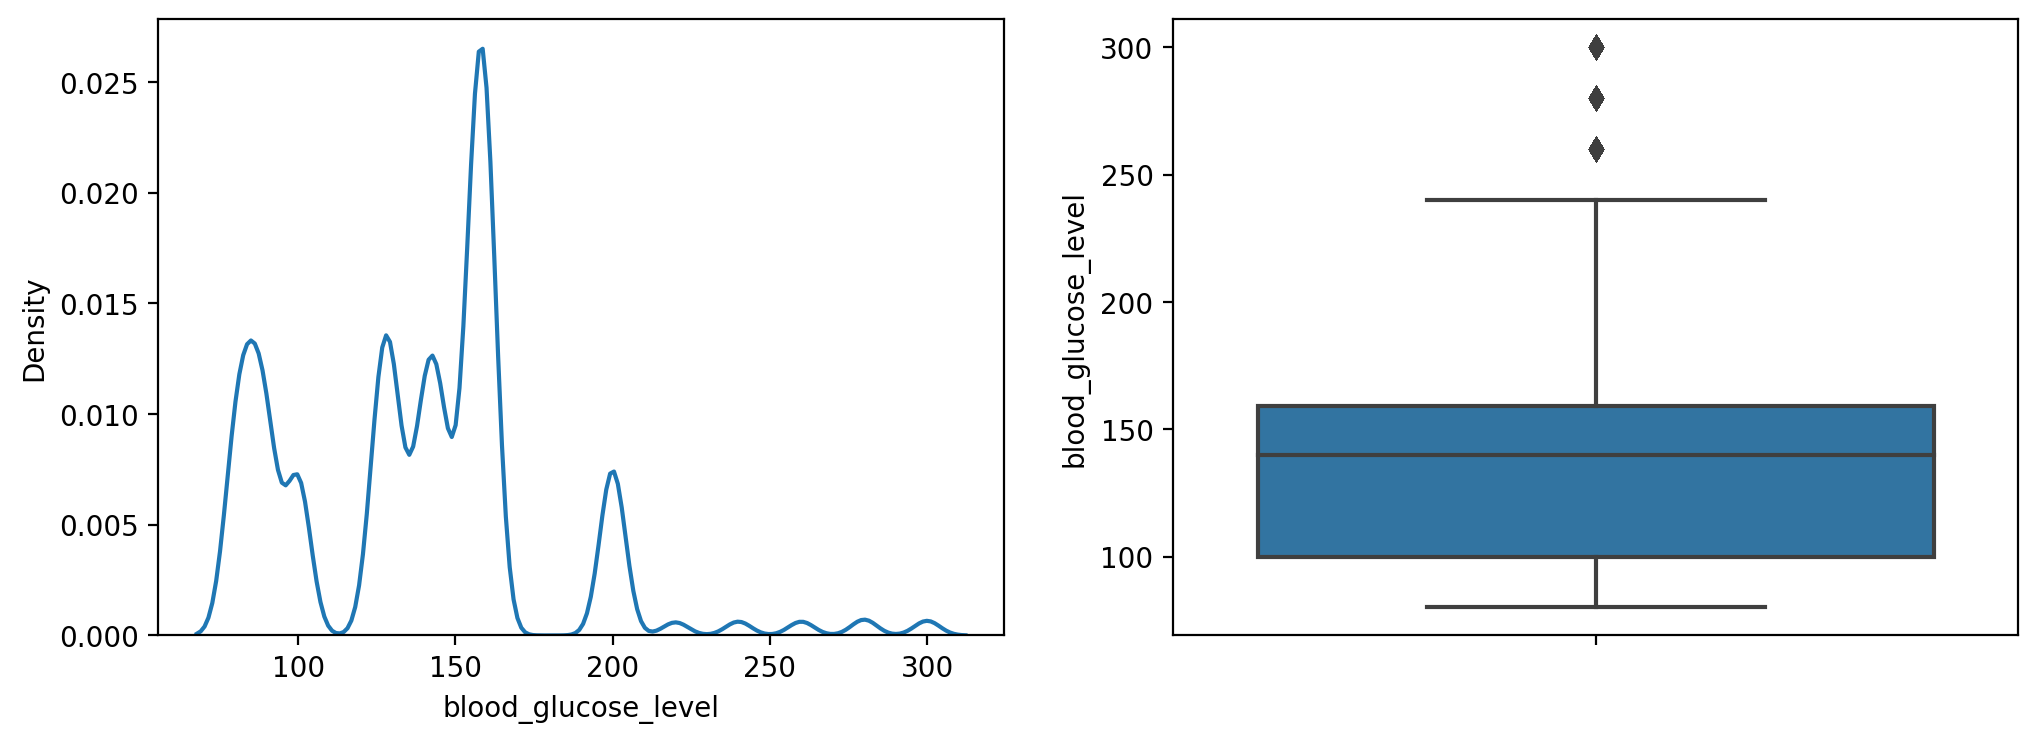

In [185]:
plt.figure(figsize = (12,4), dpi = 200)

plt.subplot(1,2,1)
sns.distplot(df['blood_glucose_level'], hist = False)

plt.subplot(1,2,2)
sns.boxplot(y = df['blood_glucose_level'])

<Axes: >

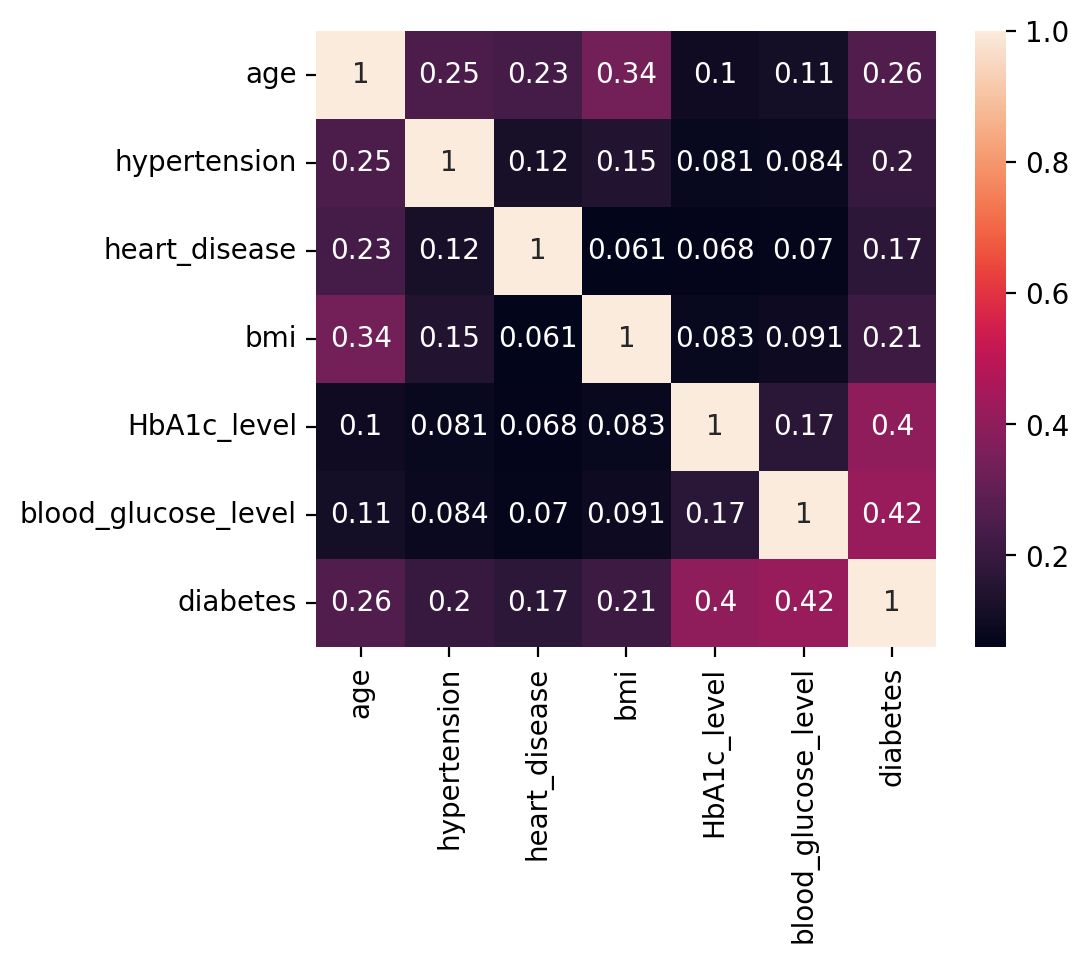

In [186]:
#Checking the correlation
plt.figure(figsize = (5,4), dpi = 200)
sns.heatmap(df.corr(), annot = True)

##Checking if the data is imbalanced

In [187]:
class_ratio = df.diabetes.value_counts(normalize = True)
print('Percentage of diabetes     : ', np.round(class_ratio[1] * 100,2), '%')
print('Percentage of non diabetes : ', np.round(class_ratio[0] * 100, 2), '%')

Percentage of diabetes     :  8.5 %
Percentage of non diabetes :  91.5 %


The data is imbalanced.

##Mapping Categorical Variables

In [188]:
df.gender = df.gender.map({'Male' : 0, 'Female' : 1, 'Other' : 2})

In [189]:
df.smoking_history = df.smoking_history.map({'not current' : 0, 'former' : 1, 'No Info' : 2, 'current' : 3, 'never' : 4, 'ever' : 5})

In [190]:
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,4,25.19,6.6,140,0
1,1,54.0,0,0,2,27.32,6.6,80,0
2,0,28.0,0,0,4,27.32,5.7,158,0
3,1,36.0,0,0,3,23.45,5.0,155,0
4,0,76.0,1,1,3,20.14,4.8,155,0


##Handling Imbalanced Data

In [191]:
from imblearn.under_sampling import NearMiss
sampler = NearMiss()
x_sampled, y_sampled = sampler.fit_resample(X, Y)

In [192]:
X = df.drop('diabetes', axis = 1)
Y = df[['diabetes']]

In [193]:
print(x_sampled.shape)
print(y_sampled.shape)

(17000, 8)
(17000, 1)


In [194]:
df_resampled = pd.concat([pd.DataFrame(x_sampled), pd.DataFrame(y_sampled)], axis=1)
df_resampled.columns = df.columns

<Axes: title={'center': 'Diabetes_resampled'}, xlabel='diabetes', ylabel='count'>

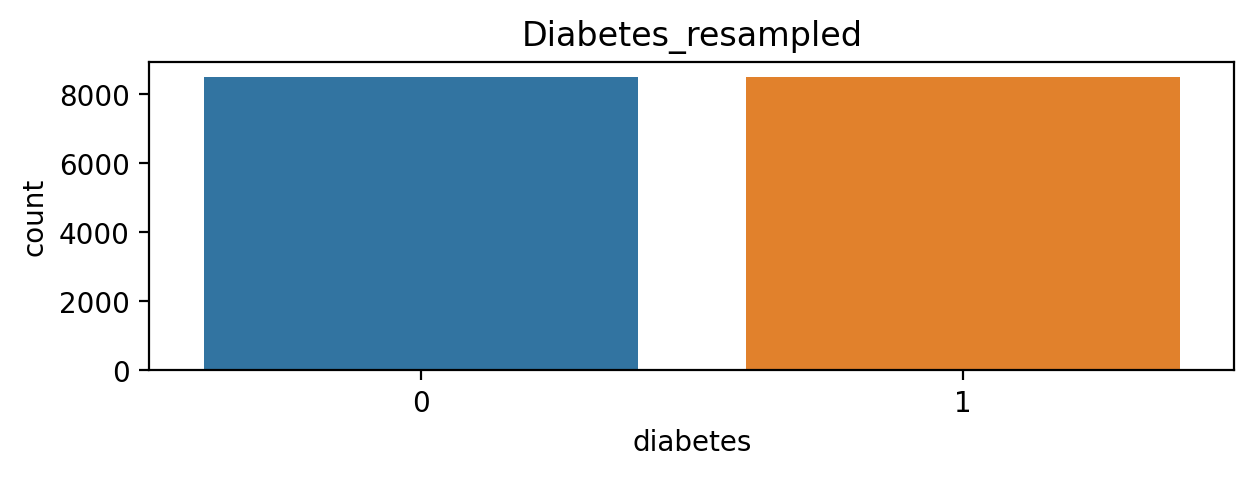

In [195]:
#Plotting countplot for target variable after NearMiss
plt.figure(figsize = (7,2), dpi = 200)
plt.title('Diabetes_resampled')
sns.countplot(x = "diabetes", data = df_resampled)

In [196]:
pd.DataFrame(y_sampled).value_counts()

diabetes
0           8500
1           8500
dtype: int64

##Splitting the data

In [197]:
#Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size = 0.2, random_state = 2)

In [198]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (13600, 8)
Training Labels Shape :  (13600, 1)
Testing Data Shape    :  (3400, 8)
Testing Labels Shape  :  (3400, 1)


# 1. Random forests
RandomForestClassifier(
>     bootstrap=True, class_weight=None, criterion='entropy',
      max_depth=10, max_features='auto', max_leaf_nodes=None,
      min_impurity_decrease=0.0, min_impurity_split=None,
      min_samples_leaf=1, min_samples_split=2,
      min_weight_fraction_leaf=0.0, n_estimators=10,
      n_jobs=None, oob_score=False, random_state=14,verbose=0,
      warm_start=False)

In [232]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, max_depth = 3, max_features = 15, criterion = 'entropy')
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features=15,
                       n_estimators=10)

In [233]:
pred_train = rf_classifier.predict(x_train)
pred_test  = rf_classifier.predict(x_test)

In [201]:
#Evaluation Metrics
print('Training Set Accuracy Score : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy Score  : ', accuracy_score(y_test, pred_test))
print('\n')
print('Training Set F1 Score : ', f1_score(y_train, pred_train))
print('Testing Set F1 Score  : ', f1_score(y_test, pred_test))

Training Set Accuracy Score :  0.8568382352941176
Testing Set Accuracy Score  :  0.8673529411764705


Training Set F1 Score :  0.851180921806925
Testing Set F1 Score  :  0.8648486664668864


## Hyperparameter Tuning
## Grid SearchCV

In [234]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

In [235]:
search_params = {
    'n_estimators' : [5,10,30],
    'max_depth'    : [2,3,5],
    'max_features' : [15,20,25],
    'criterion'    : ['gini', 'entropy']
}

In [236]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = rf_classifier,
                           param_grid = search_params,
                           scoring = ['f1'],
                           cv = 5,
                           refit = 'f1',
                           verbose = 3)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=15, n_estimators=5; f1: (test=0.791) total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=15, n_estimators=5; f1: (test=0.808) total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=15, n_estimators=5; f1: (test=0.791) total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=15, n_estimators=5; f1: (test=0.797) total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=15, n_estimators=5; f1: (test=0.807) total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2, max_features=15, n_estimators=10; f1: (test=0.791) total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=15, n_estimators=10; f1: (test=0.808) total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=15, n_estimators=10; f1: (test=0.791) total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_f

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5], 'max_features': [15, 20, 25],
                         'n_estimators': [5, 10, 30]},
             refit='f1', scoring=['f1'], verbose=3)

In [205]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 15,
 'n_estimators': 30}

In [206]:
grid_search.best_score_

0.8633611805973395

In [207]:
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=15,
                       n_estimators=30)

In [208]:
df = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_f1')
df.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
47,0.295819,0.010210,0.020193,0.000687,entropy,5,15,30,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.865339,0.863962,0.857833,0.863379,0.866293,0.863361,0.002947,1
53,0.420320,0.005441,0.026825,0.001846,entropy,5,25,30,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.865624,0.863150,0.857829,0.862997,0.862651,0.862450,0.002540,2
50,0.291150,0.005288,0.018557,0.000817,entropy,5,20,30,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.867327,0.865164,0.855178,0.858533,0.865600,0.862360,0.004675,3
25,0.098625,0.003311,0.013896,0.002484,gini,5,25,10,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.856329,0.857143,0.862495,0.864358,0.869015,0.861868,0.004705,4
21,0.053085,0.003260,0.011983,0.001684,gini,5,20,5,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.853477,0.858432,0.856098,0.868390,0.870079,0.861295,0.006691,5


#--------------------------------------------------------------------------------------------------------------------------------------------

#  2.  DecisionTreeClassifier(
>      class_weight=None, criterion='entropy', max_depth=8
       max_features=None, max_leaf_nodes=None,
       min_impurity_decrease=0.0, min_impurity_split=None,
       min_samples_leaf=1, min_samples_split=2,
       min_weight_fraction_leaf=0.0, presort=False,
       random_state=14, splitter='best')**

In [237]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [238]:
pred_train = dt_classifier.predict(x_train)
pred_test = dt_classifier.predict(x_test)

In [239]:
#Evaluation Metrics
print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))
print('\n')
print('Training Set F1 Score : ', f1_score(y_train, pred_train))
print('Testing Set F1 Score  : ', f1_score(y_test, pred_test))

Training Set Accuracy :  0.8702205882352941
Testing Set Accuracy  :  0.8723529411764706


Training Set F1 Score :  0.8562118126272913
Testing Set F1 Score  :  0.8626582278481013


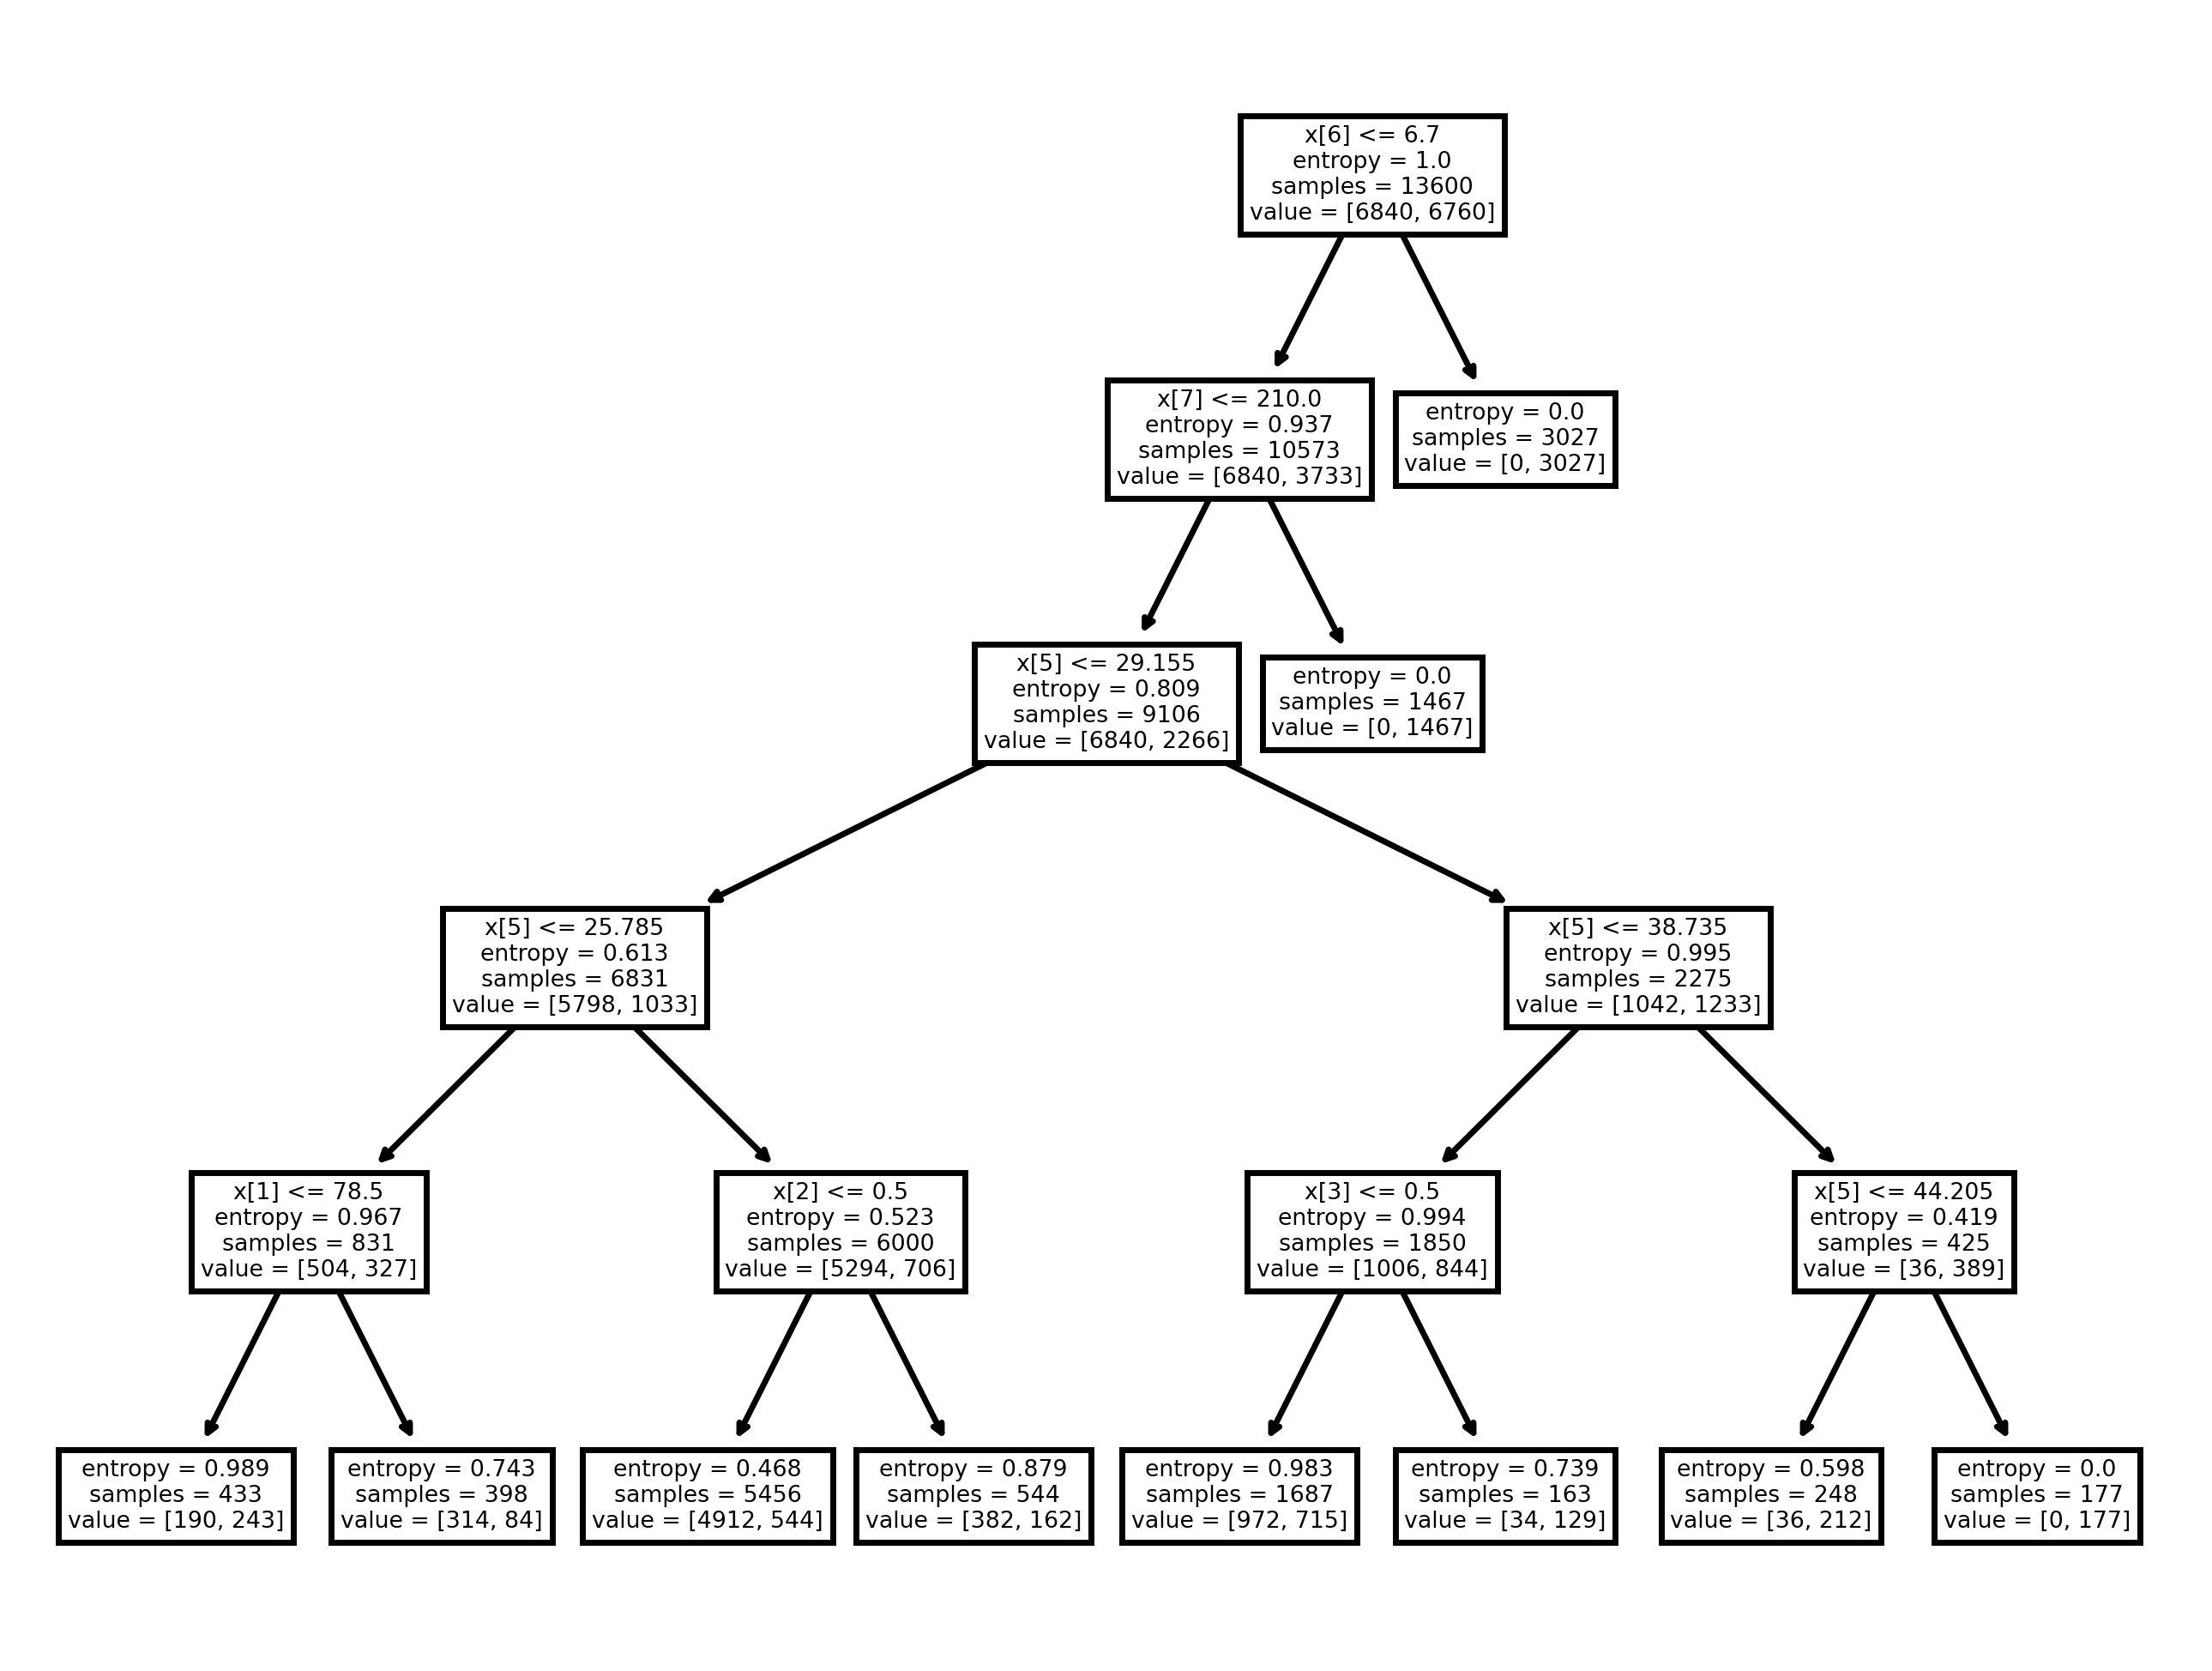

In [244]:
from sklearn.tree import plot_tree
plt.figure(dpi = 500)
plot_tree(dt_classifier)
plt.show()

#--------------------------------------------------------------------------------------------------------------------------------------------

#3. Logistic Regression

In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [224]:
y_pred = logreg.predict(x_test)

In [225]:
#Evaluation Metrics
print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))
print('\n')
print('Training Set F1 Score : ', f1_score(y_train, pred_train))
print('Testing Set F1 Score  : ', f1_score(y_test, pred_test))

Training Set Accuracy :  0.8702205882352941
Testing Set Accuracy  :  0.8723529411764706


Training Set F1 Score :  0.8562118126272913
Testing Set F1 Score  :  0.8626582278481013


#--------------------------------------------------------------------------------------------------------------------------------------------

# 4 . XGBoost
>   base_score=0.5, booster='gbtree', colsample_bylevel=1,
    colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
    importance_type='gain', interaction_constraints='',
    learning_rate=0.300000012, max_delta_step=0, max_depth=6,
    min_child_weight=1, missing=nan, monotone_constraints='()',
    n_estimators=5, n_jobs=4, num_parallel_tree=1,
    objective='multi:softprob', random_state=0, reg_alpha=0,
    reg_lambda=1, scale_pos_weight=None, subsample=1,
    tree_method='exact', use_label_encoder=True,
    validate_parameters=1, verbosity=None)

In [226]:
from xgboost import XGBClassifier
xg_classifier = XGBClassifier(n_estimators = 50, max_depth = 5, learning_rate = 0.1)
xg_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [227]:
pred_train = xg_classifier.predict(x_train)
pred_test  = xg_classifier.predict(x_test)

In [228]:
#Evaluation Metrics
print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))
print('\n')
print('Training Set F1 Score : ', f1_score(y_train, pred_train))
print('Testing Set F1 Score  : ', f1_score(y_test, pred_test))

Training Set Accuracy :  0.8935294117647059
Testing Set Accuracy  :  0.8935294117647059


Training Set F1 Score :  0.8845847282002232
Testing Set F1 Score  :  0.8876474239602732


# --------------------------------------------------------------------------------------------------------------- 